In [2]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf

plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (10, 8)
import imageio as imageio
import glob

In [3]:
def getEr(lambd):
    m = 9.10938356e-31
    q = 1.60217662e-19
    c = 299792458
    w = 2 * 3.14159 * c / lambd
    return m * w * c / q

In [4]:
Er = getEr(1e-6)
Er


3210698360819.1753

In [13]:
# EXTENT = [-20, 20, -20, 20]
X = np.linspace(-20, 20, 4000)
all_files = glob.glob("data/*.sdf")


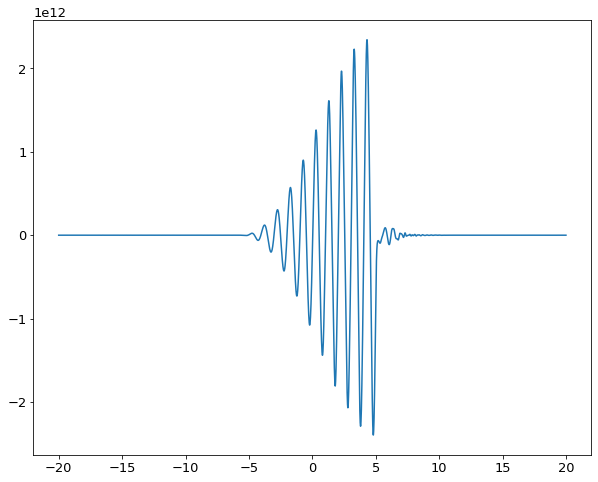

In [14]:
data = sdf.read(all_files[100])
plt.plot(X, data.Electric_Field_Ey.data)


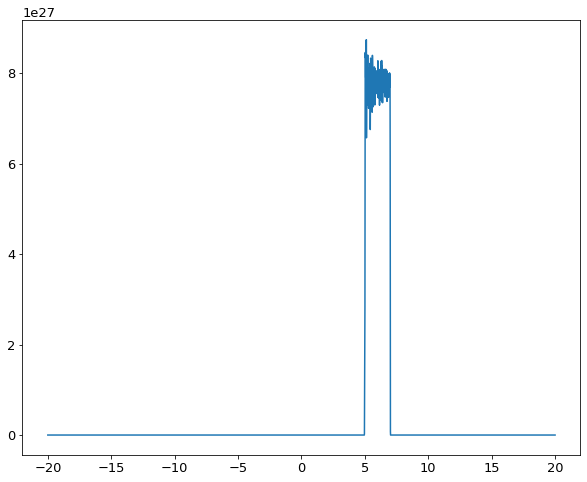

In [15]:
plt.plot(X, data.Derived_Number_Density_Electron.data)


In [16]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field


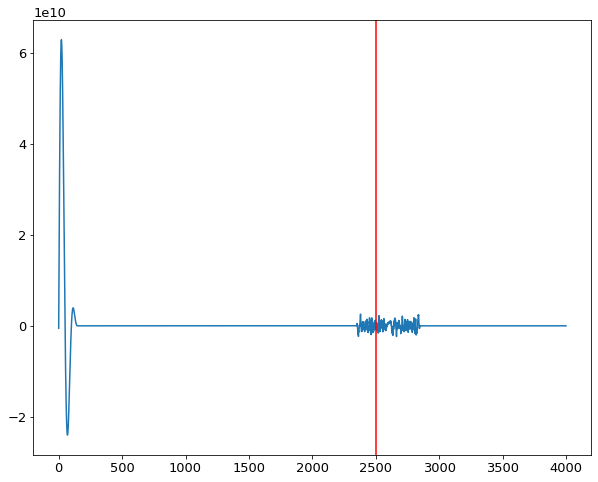

In [19]:
Ey = get_field(5)
plt.plot(Ey)
plt.axvline(2500, color="red")
plt.show()


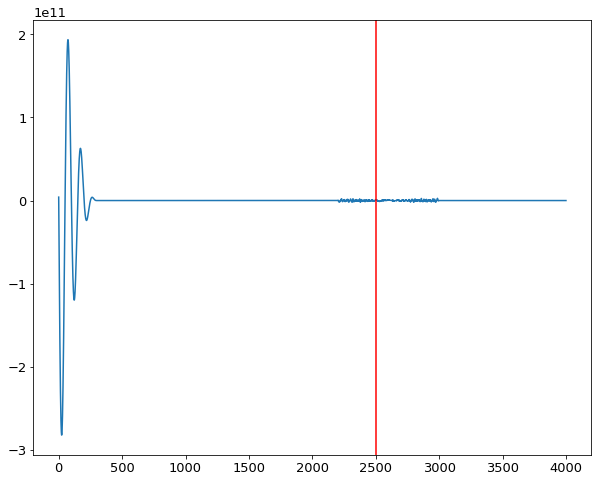

(0.0, 1.0)

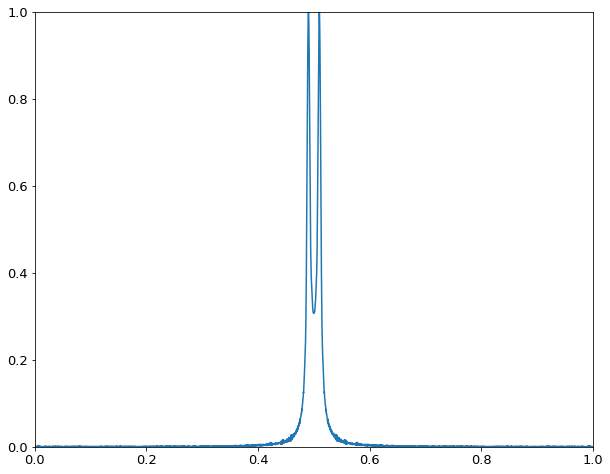

In [20]:
Ey = get_field(10)
plt.plot(Ey)
plt.axvline(2500, color="red")
plt.show()

Ey_f = np.abs(np.fft.fft(Ey))
Ey_f = np.fft.fftshift(Ey_f)
plt.plot(np.linspace(0, 1, 4000), Ey_f / np.max(Ey_f))
plt.axvline(500, color="red")
plt.xlim(0, 1)
plt.ylim(0, 1)

In [21]:
Et1 = []
Et2 = []
d = []
all_field = []
for i in range(len(all_files)):
    data = get_field(i, "y")
    all_field.append(data)
    Et1.append(data[400])
    Et2.append(data[2300])
    data = sdf.read(all_files[i])
    d.append(data.Derived_Number_Density_Electron.data)


In [28]:
dt = 1
tau = 1e-6/3e8*1e15
t = np.arange(0, len(all_files)) * dt
EXTENT = [-10, 10, 55, 0]

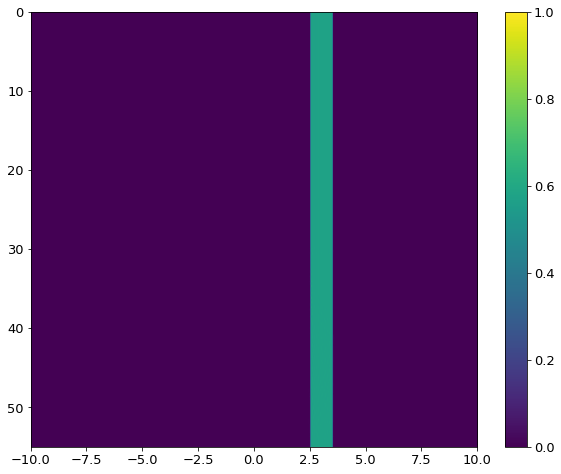

In [29]:
plt.imshow(d / np.max(d), aspect="auto", extent=EXTENT)
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

In [30]:
d = np.array(d)
d.shape

(185, 4000)

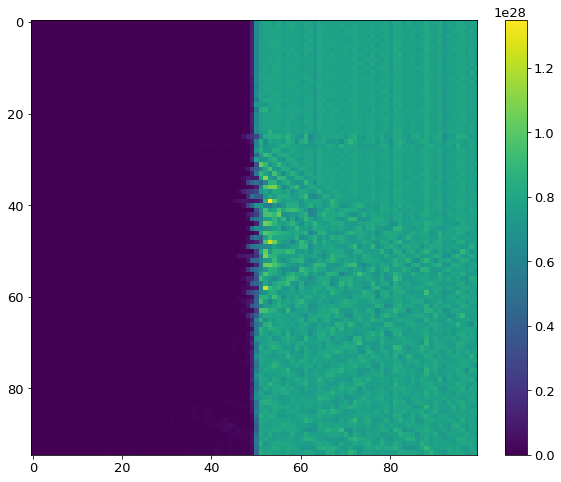

In [31]:
plt.imshow(d[75:170, 2450:2550], aspect="auto")
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

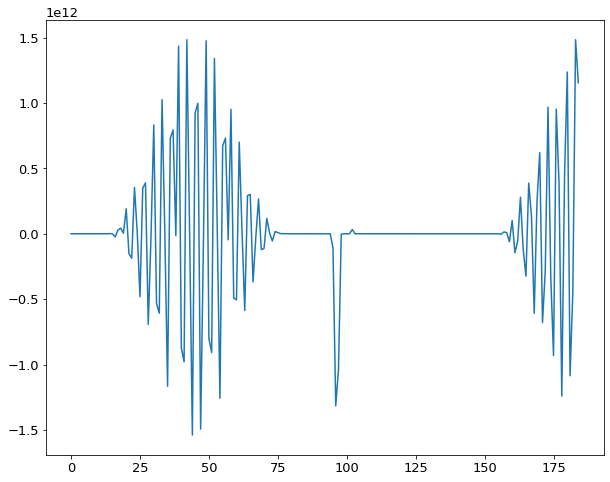

In [32]:
plt.plot(Et1)

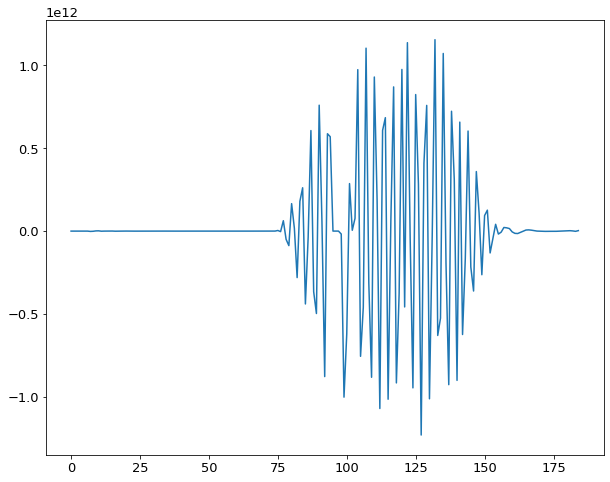

In [33]:
plt.plot(Et2)


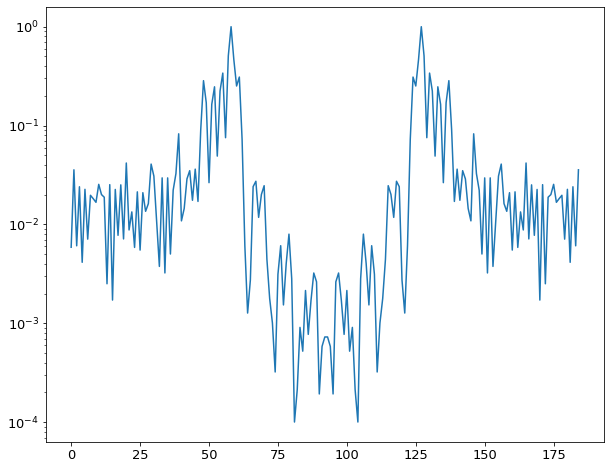

In [34]:
eyt = np.abs(np.fft.fft(np.array(Et1)))
# eyt = np.fft.fftshift(eyt)
plt.plot(eyt**2 / np.max(eyt**2))
plt.yscale("log")
# plt.ylim(0,1)

In [281]:
omega_0 = 2 * np.pi * 299792458 / 1e-6
omega_0 * 1e-15

1.8836515673088534

In [282]:
# eyt = np.array(Et2) / Er
# eyt = np.abs(np.fft.fft(eyt))
# plt.plot(omega, eyt**2)[: L // 2] / np.max(eyt**2)
# plt.ylim(0, 1)

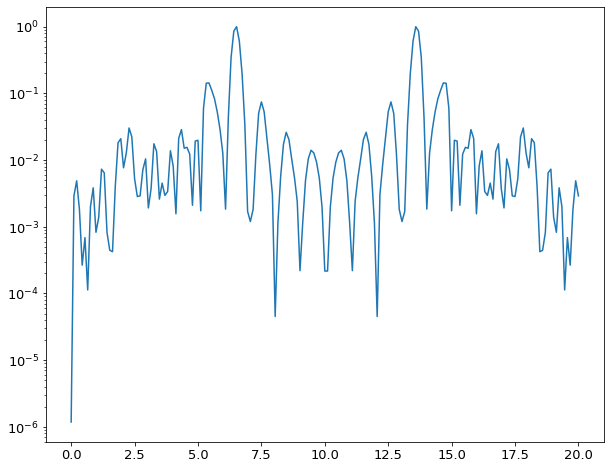

In [283]:
eyt = np.array(Et2) / Er
eyt = np.abs(np.fft.fft(eyt))
plt.plot(np.linspace(0, 20, len(eyt)), eyt**2 / np.max(eyt**2))
# plt.ylim(0,1);
plt.yscale("log")

In [284]:
def plot_field(file, component="y", save=True, dir=".temp"):
    raw_data = sdf.read(file)
    image_name = file.split(".sdf")[0]
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    t = raw_data.Header["time"] * 1e15
    x = np.linspace(-20, 20, len(field))
    plt.plot(x, field)
    plt.axvline(5, color="red", lw=2)
    plt.axvline(7, color="red", lw=2)
    plt.xlabel("x [$\mu m$]")
    plt.ylabel("E [$\\frac{N}{C}$]")
    plt.title(f"E{component} at {t:.0f} fs")
    # print(image_name)
    if save:
        plt.savefig(dir + "/" + image_name + ".jpg")
        plt.close()
    else:
        plt.show()

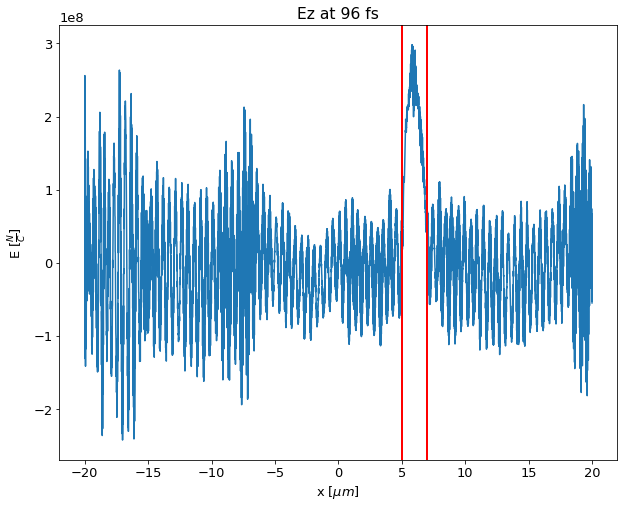

In [285]:
plot_field(all_files[100], component="z", save=False)

In [286]:
def make_video(dir=".temp", name="video.mp4", delete=False):
    images = []
    files = glob.glob(f"{dir}/*.jpg")
    for file in files:
        images.append(imageio.imread(file))
    if name.endswith(".mp4"):
        imageio.mimsave(f"{dir}/{name}", images)
    else:
        imageio.mimsave(f"{dir}/{name}", images, duration=0.1)
    if delete:
        for file in files:
            os.remove(file)


In [287]:
i=0
for file in all_files:
    print(i, end="\r")
    # plot_field(file)
    i+=1


In [288]:
# make_video(delete=True)


In [289]:
data = sdf.read(all_files[10])


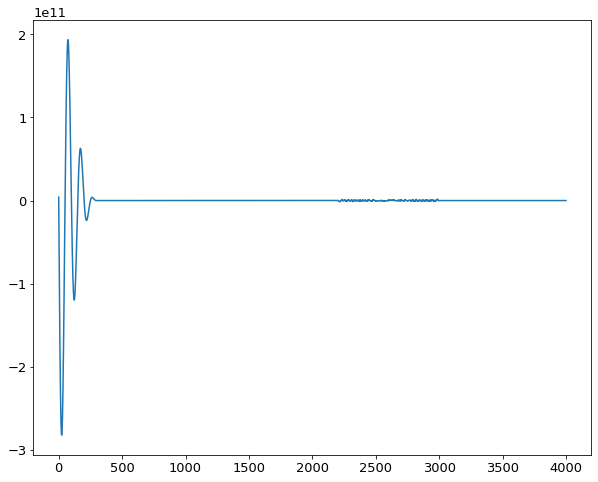

In [290]:
plt.plot(data.Electric_Field_Ey.data)


In [291]:
from scipy.fftpack import fft, fftfreq

In [304]:
dt = (75/5780) * 1e-15

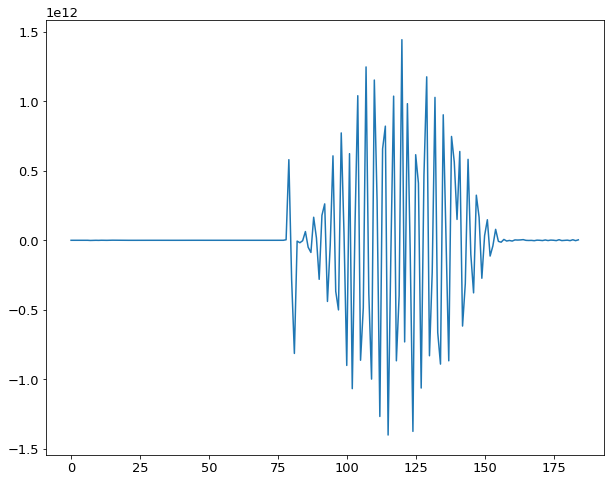

In [305]:
plt.plot(Et2)

In [306]:
Y = fft(np.array(Et2)/Er)
Y = np.abs(Y)

In [307]:
x = fftfreq(len(Et2), dt)

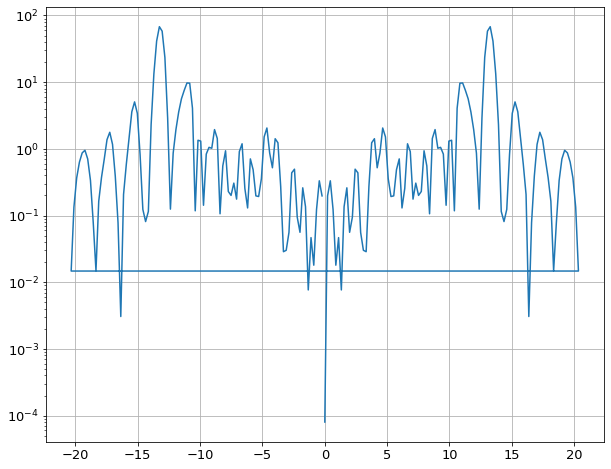

In [311]:
plt.plot(x/omega_0, (Y)**2)
plt.yscale("log")
# plt.xlim(10,20)
plt.grid()